/var/folders/n4/p2lmf2l94x3gfqhs72xx2zwr0000gn/T/ipykernel_32808/2618575910.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed


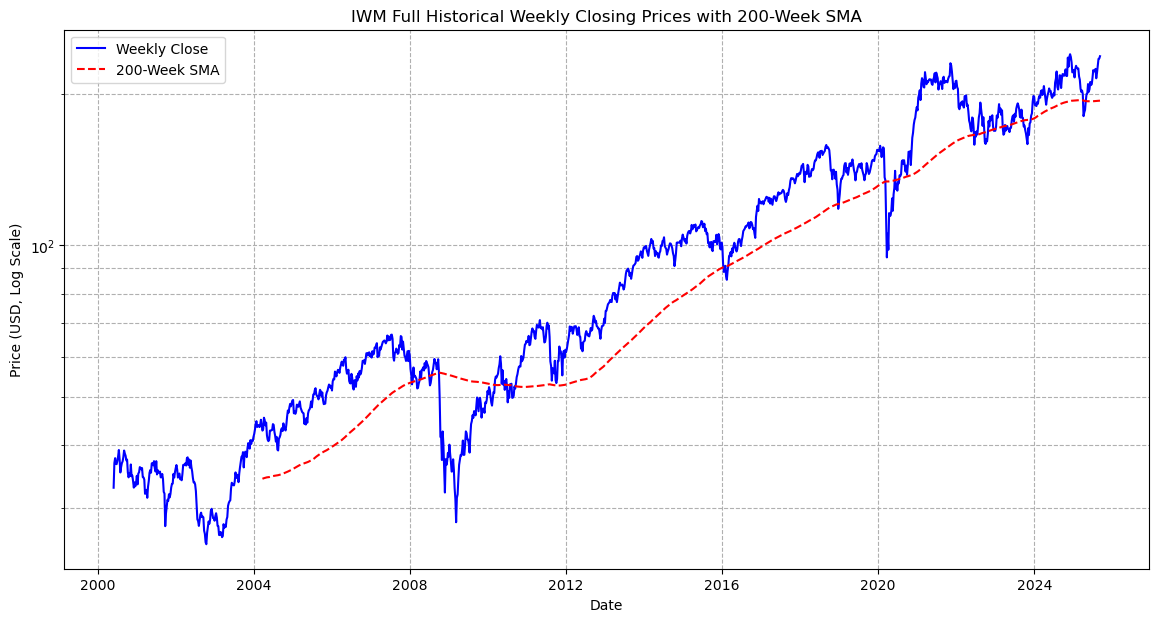

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download full historical stock data from Yahoo Finance
ticker = 'IWM'
data = yf.download(ticker, period='max', interval='1d')

# Extract historical close series
close_series = data['Close']

# Resample to weekly closing prices (using the last price of the week)
# .dropna() is used to remove any weeks with no trading data.
weekly_close = close_series.resample('W').last().dropna()

# Calculate the 200-week Simple Moving Average (SMA)
sma_200 = weekly_close.rolling(window=200).mean()

# Plot the weekly closing prices and the 200-week SMA
plt.figure(figsize=(14, 7))
plt.plot(weekly_close, label='Weekly Close', color='blue')
plt.plot(sma_200, label='200-Week SMA', color='red', linestyle='--')

# Use a logarithmic scale for better visualization of long-term trends
plt.yscale('log')  

plt.title(f'{ticker} Full Historical Weekly Closing Prices with 200-Week SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD, Log Scale)')
plt.legend()
plt.grid(True, which="both", ls="--") # Grid lines for both major and minor ticks
plt.show()